# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [4]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

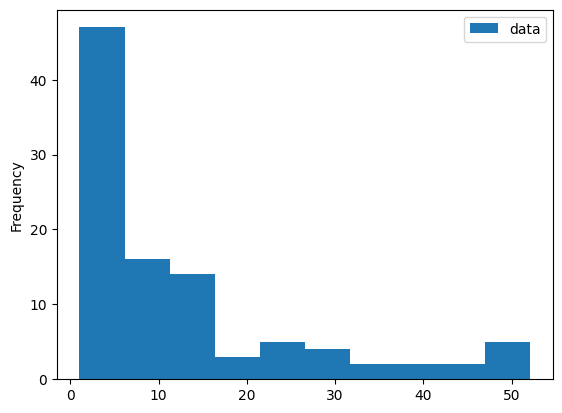

In [5]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

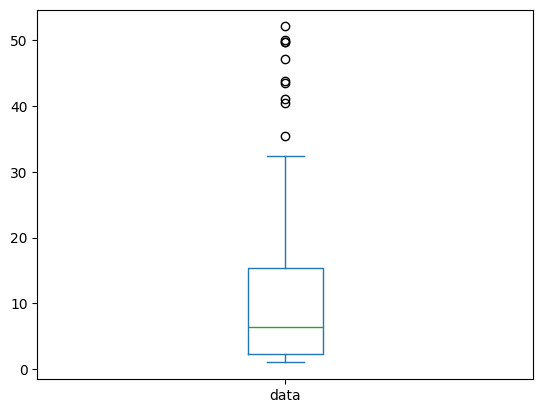

In [6]:
df.plot.box()

## Histogram vs Boxplot 

The histogram and boxplot both show the same drug price data, but they help in different ways.

A **histogram** is useful because it shows the overall pattern of prices. For example, it can show if most drugs are low-cost and only a few are very expensive. A downside is that the graph can look different depending on bin size.

A **boxplot** is useful for a quick summary. It clearly shows the median, spread, and possible outliers. The downside is that it does not show the full shape of the data distribution.

If I had to choose one for this question, I would choose the **histogram**, since the administrator wants to understand how expensive drugs compare with the rest of the prices. Still, using both together gives the best view.

### Formatting improvements
- Add a clear title and axis labels (price in dollars).
- Use better colors to separate normal prices from expensive ones.
- Add vertical lines for median and 75th percentile.
- Adjust bin width so the histogram is easy to read.
- Use a log scale if prices are very spread out.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

Total images found: 50,000


,mean,median,mode
class_name,,,
colon_aca,95.44,95.79,96.84
colon_n,92.01,92.13,102.16
lung_scc,65.46,65.11,65.76
lung_aca,62.06,61.78,62.36
lung_n,54.06,54.06,47.41


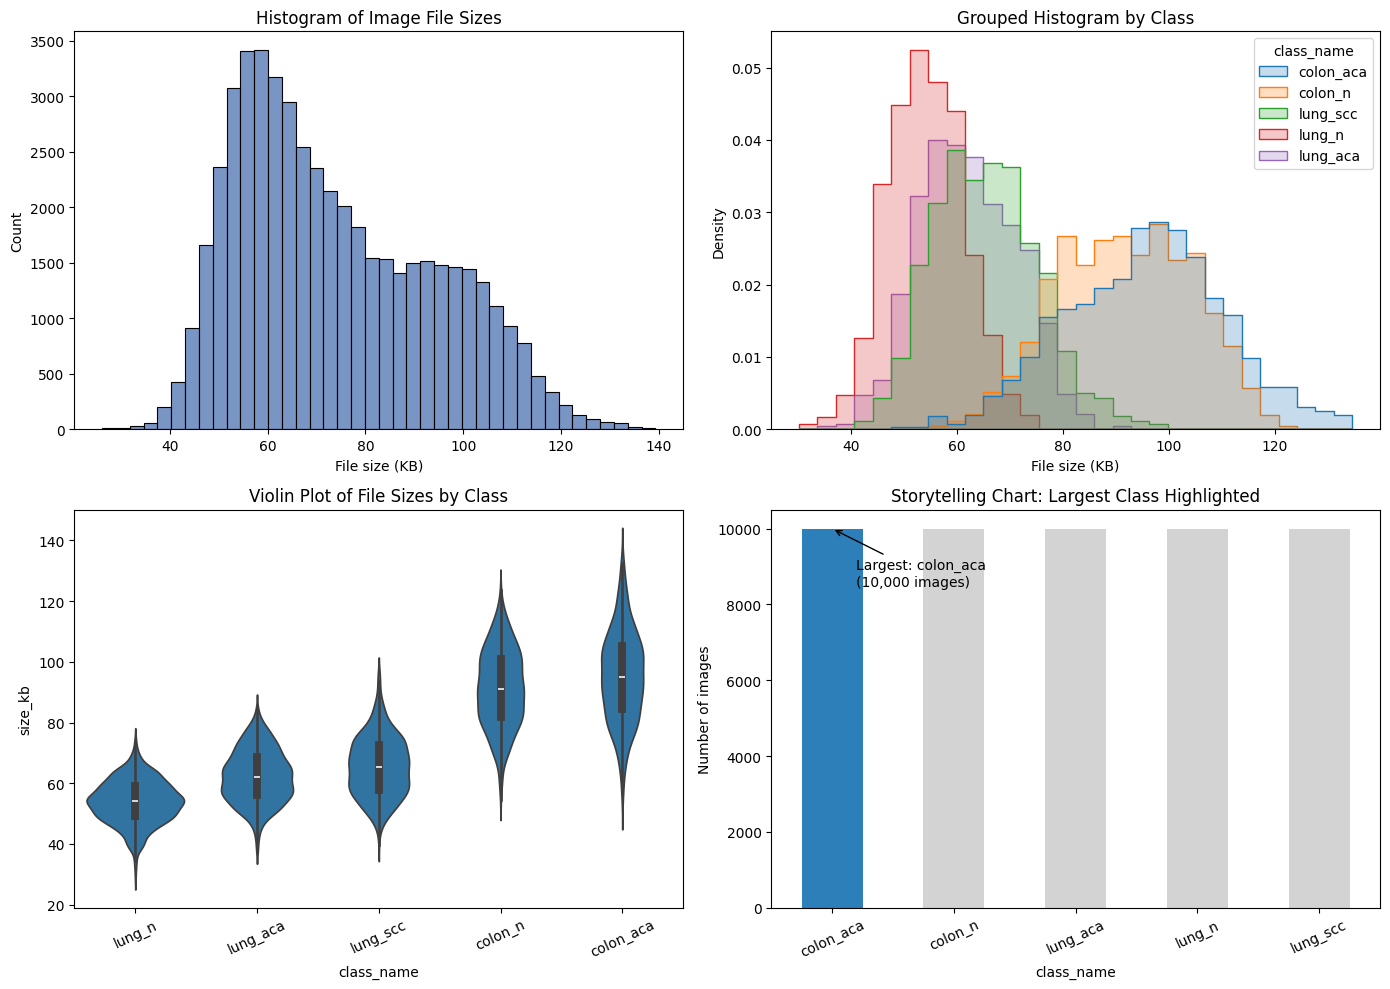

Conclusion: file-size distributions are right-skewed with class-level differences, and the highlighted bar chart quickly communicates the dominant class.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Use image files from the Data folder
root = Path("Data")
image_exts = {".jpeg"}
records = []

for file_path in root.rglob("*"):
    if file_path.suffix.lower() in image_exts and file_path.is_file():
        records.append({
            "dataset": file_path.parents[1].name if len(file_path.parents) > 1 else "Unknown",
            "class_name": file_path.parent.name,
            "size_kb": file_path.stat().st_size / 1024
        })

img_df = pd.DataFrame(records)
print(f"Total images found: {len(img_df):,}")

# Means, medians, and modes for file size by class
size_stats = img_df.groupby("class_name")["size_kb"].agg([
    "mean",
    "median",
    lambda s: s.mode().iloc[0] if not s.mode().empty else np.nan
]).rename(columns={"<lambda_0>": "mode"})

display(size_stats.sort_values("mean", ascending=False).round(2))

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Histogram of file sizes
sns.histplot(data=img_df, x="size_kb", bins=40, ax=ax[0, 0], color="#4C72B0")
ax[0, 0].set_title("Histogram of Image File Sizes")
ax[0, 0].set_xlabel("File size (KB)")

# Grouped histogram by class (sampled for readability)
sampled = img_df.sample(n=min(len(img_df), 6000), random_state=0)
sns.histplot(
    data=sampled,
    x="size_kb",
    hue="class_name",
    bins=30,
    element="step",
    stat="density",
    common_norm=False,
    ax=ax[0, 1]
)
ax[0, 1].set_title("Grouped Histogram by Class")
ax[0, 1].set_xlabel("File size (KB)")

# Violin plot by class (sampled for readability)
violin_sample = img_df.sample(n=min(len(img_df), 4000), random_state=1)
sns.violinplot(data=violin_sample, x="class_name", y="size_kb", ax=ax[1, 0])
ax[1, 0].set_title("Violin Plot of File Sizes by Class")
ax[1, 0].tick_params(axis="x", rotation=25)

# Storytelling-style chart: highlight top class
class_counts = img_df["class_name"].value_counts()
highlight_class = class_counts.idxmax()
colors = ["#D3D3D3" if c != highlight_class else "#2C7FB8" for c in class_counts.index]
class_counts.plot(kind="bar", ax=ax[1, 1], color=colors)
ax[1, 1].set_title("Storytelling Chart: Largest Class Highlighted")
ax[1, 1].set_ylabel("Number of images")
ax[1, 1].tick_params(axis="x", rotation=25)
ax[1, 1].annotate(
    f"Largest: {highlight_class}\n({class_counts.max():,} images)",
    xy=(0, class_counts.max()),
    xytext=(0.2, class_counts.max() * 0.85),
    textcoords="data",
    arrowprops=dict(arrowstyle="->", color="black")
)

plt.tight_layout()
plt.show()

print("Conclusion: file-size distributions are right-skewed with class-level differences, and the highlighted bar chart quickly communicates the dominant class.")

### Homework Conclusions

- The image-size distributions are mostly right-skewed, with class-specific centers and spread.
- Grouped histograms make class differences visible, while violin plots show shape and variability in each class.
- Category counts appear balanced at the class level in this dataset, but file-size distributions are still distinct.
- The storytelling bar chart with one highlighted class improves focus and communicates the key takeaway quickly.
- Overall, these data look usable for downstream analysis/modeling because class size is large and distributions are interpretable.